# Ocean Related NDCs

A radial pie chart chart displaying whether sectoral adaptation and mitigation measures have been made by each country in sub-sectors related to ocean management. For the global widget, the radius of the pie peice represents the number of countries with measures in a given sub-sector. For the global widget, the radius of the pie peice represents the number of countries with measures in a given sub-sector fit to a log scale.<br>

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted. 

*Author: Rachel Thoms
<br>Created: 03 Sept 2021
<br>Environment: jupyterlab*

## Style

- Vega chart
- Chart type: Radial Pie Chart
- Value: Boolean- whether a measure is specified (country level), number of measures (global level) 

## Data


- Underlying dataset: [ocn_025](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_025_rw0_ocean_ndc_measures)
- Source: [Climate Watch](https://www.climatewatchdata.org/data-explorer/ndc-content?ndc-content-categories=All%20Selected&ndc-content-countries=All%20Selected&ndc-content-indicators=All%20Selected&ndc-content-sectors=All%20Selected&page=1)

## Preparation

The underlying dataset was processed using a python script. See the script [here](../../datasets/ocn_025_rw0_ocean_ndcs/ocn_025_rw0_ocean_ndcs.py). TNo additional processing was executed to create the widget.

### Vega

In [35]:
import json
from vega import Vega
from IPython.display import display

In [36]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [28]:
widget_width = 500
widget_height = 500

## Visualization

### Queries

```gadm.geostore_prod ILIKE 'ca5bfde08587530e76c17fe48362a01d'``` used as stand-in for parameterized ```{{geostore_env}}='{{geostore_id}}'``` in production version

```sql
SELECT gid_0, name_0, sector, subsector, indicator_id, indicator_name, value, count FROM ocn_025_rw0_ocean_ndc_measures data INNER JOIN gadm36_0 gadm ON data.iso_code3 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b'

```

### Testing Widget Config

The following vega spec is used to visualize the intended widget display in the vega editor and this notebook. Due to differences in the rendering of the custom widget editor on Resource Watch, several changes were made to this specification before adding it to Resource Watch. Please see the 2nd spec for these changes.

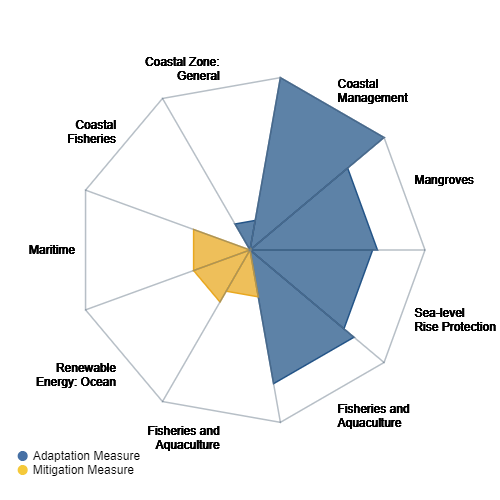

In [49]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "A radar chart example, showing multiple dimensions in a radial layout.",
  "width": 500,
  "height": 500,
  "padding": 75,
  "autosize": {"type": "none", "contains": "padding"},

  "signals": [
    {"name": "radius", "update": "width / 2"}
  ],

   "data": [
    {
      "name": "data",
      "url": "https://wri-rw.carto.com/api/v2/sql?q= SELECT gid_0, name_0, sector, subsector, indicator_id, indicator_name, value, count FROM ocn_025_rw0_ocean_ndc_measures data INNER JOIN gadm36_0 gadm ON data.iso_code3 = gadm.gid_0 WHERE gid_0 ILIKE 'GLB'",
      "format": {"type": "json", "property": "rows"}
    },
    {
    "name": "key1",
    "values": [
        {"indicator": "a_coastal_fisheries_auto", "key": 0, "type": "Adaptation"},
        {"indicator": "a_coastal_zone_general_auto", "key": 1, "type": "Adaptation"},
        {"indicator": "a_coastal_management_auto", "key": 2, "type": "Adaptation"},
        {"indicator": "a_mangroves_auto", "key": 3, "type": "Adaptation"},
        {"indicator": "a_sea_level_rise_protection_auto", "key": 4, "type": "Adaptation"},
        {"indicator": "a_fisheries_and_aquaculture_auto", "key": 5, "type": "Adaptation"},
        {"indicator": "m_fisheries_and_aquaculture_auto", "key": 6, "type": "Mitigation"},
        {"indicator": "m_renewable_energy_ocean_auto", "key": 7, "type": "Mitigation"},
        {"indicator": "m_maritime_auto", "key": 8, "type": "Mitigation"}
      ],
    "transform": [
        {
          "as": ["country","value","category","name", "measure"],
          "fields": ["indicator"],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": ["name_0","count","indicator_id","indicator_name", "value"]
        },
        {
          "type": "formula",
          "expr": "datum.name === 'Renewable Energy: Ocean' ? 'Renewable,Energy: Ocean' : datum.name === 'Sea-level Rise Protection' ? 'Sea-level,Rise Protection' : datum.name === 'Fisheries and Aquaculture' ? 'Fisheries and,Aquaculture': datum.name === 'Coastal Zone: General' ? 'Coastal Zone:,General' : datum.name === 'Coastal management' ? 'Coastal,Management' : datum.name === 'Coastal Fisheries' ? 'Coastal,Fisheries' :datum.name",
          "as": "label"
        }
      ]
    },
    {
    "name": "key2",
    "values": [
        {"indicator": "a_coastal_fisheries_auto", "key": 1, "type": "Adaptation"},
        {"indicator": "a_coastal_zone_general_auto", "key": 2, "type": "Adaptation"},
        {"indicator": "a_coastal_management_auto", "key": 3, "type": "Adaptation"},
        {"indicator": "a_mangroves_auto", "key": 4, "type": "Adaptation"},
        {"indicator": "a_sea_level_rise_protection_auto", "key": 5, "type": "Adaptation"},
        {"indicator": "a_fisheries_and_aquaculture_auto", "key": 6, "type": "Adaptation"},
        {"indicator": "m_fisheries_and_aquaculture_auto", "key": 7, "type": "Mitigation"},
        {"indicator": "m_renewable_energy_ocean_auto", "key": 8, "type": "Mitigation"},
        {"indicator": "m_maritime_auto", "key": 0, "type": "Mitigation"}
      ],
    "transform": [
        {
          "as": ["country","value", "category", "name", "measure"],
          "fields": ["indicator"],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": ["name_0","count","indicator_id", "indicator_name", "value"]
        }
      ]
    },
    {
      "name": "lines",
      "source": ["key1","key2"]
    },
    {
    "name": "zeros",
    "values": [
        {"indicator": "a_coastal_fisheries_auto", "key": 2, "type": "Adaptation"},
        {"indicator": "a_coastal_zone_general_auto", "key": 3, "type": "Adaptation"},
        {"indicator": "a_coastal_management_auto", "key": 4, "type": "Adaptation"},
        {"indicator": "a_mangroves_auto", "key": 5, "type": "Adaptation"},
        {"indicator": "a_sea_level_rise_protection_auto", "key": 6, "type": "Adaptation"},
        {"indicator": "a_fisheries_and_aquaculture_auto", "key": 7, "type": "Adaptation"},
        {"indicator": "m_fisheries_and_aquaculture_auto", "key": 8, "type": "Mitigation"},
        {"indicator": "m_renewable_energy_ocean_auto", "key": 0, "type": "Mitigation"},
        {"indicator": "m_maritime_auto", "key": 1, "type": "Mitigation"}
      ],
    "transform": [
        {
          "type": "formula",
          "expr": "0",
          "as": "value"
        },
        {
          "type": "formula",
          "expr": "datum.indicator",
          "as": "category"
        },
        {
          "as": ["country","name","measure"],
          "fields": ["indicator"],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": ["name_0","indicator_name", "value"]
        }
      ]
    },
    {
      "name": "table",
      "source": ["key1","key2","zeros"],
      "transform": [
        {
          "as": ["count"],
          "fields": ["indicator"],
          "from": "key1",
          "key": "indicator",
          "type": "lookup",
          "values": ["value"]
        }
      ]
    },
    {
      "name": "keys",
      "source": "table",
      "transform": [
        {
          "type": "aggregate",
          "groupby": ["key"]
        }
      ]
    }
  ],

  "scales": [
    {
      "name": "angular",
      "type": "point",
      "range": {"signal": "[-PI, PI]"},
      "padding": 0.5,
      "domain": {"data": "table", "field": "key"}
    },
    {
      "name": "angular_text",
      "type": "point",
      "range": {"signal": "[-PI + PI/9, PI + PI/9]"},
      "padding": 0.5,
      "domain": {"data": "table", "field": "key"}
    },
    {
      "name": "radial",
      "type": "symlog",
      "range": {"signal": "[0, radius]"},
      "zero": true,
      "nice": false,
      "domain": {"data": "table", "field": "value"},
      "domainMin": 0
    },
    {
      "name": "mitigation",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "category"
      },
      "range": ["#e9a81f"]
    },
    {
      "name": "adaptation",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "category"
      },
      "range": [
        "#235487"
      ],
      "reverse": true
    },
    {
      "name": "legend",
      "type": "ordinal",
      "domain": [
        "Adaptation Measure",
        "Mitigation Measure"
      ],
      "range": [
        "#4670A5",
        "#f5c93a"
      ]
    }
  ],

  "encode": {
    "enter": {
      "x": {"signal": "radius"},
      "y": {"signal": "radius"}
    }
  },

  "marks": [
    {
      "type": "group",
      "name": "categories",
      "zindex": 0,
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": ["category"]}
      },
      "marks": [
        {
          "type": "line",
          "name": "category-line",
          "from": {"data": "facet"},
          "encode": {
            "enter": {
              "interpolate": {"value": "linear-closed"},
              "x": {
                "signal": "scale('radial', datum.value) * cos(scale('angular', datum.key))"
              },
              "y": {
                "signal": "scale('radial', datum.value) * sin(scale('angular', datum.key))"
              },
               "stroke": [
                {"test":"datum.measure === 'No Sectoral Measure Specified'", 
                "value":"transparent"}, 
                {"test":"datum.type === 'Mitigation'", 
                "scale": "mitigation", 
                "field": "category"},
                {"scale": "adaptation", 
                "field": "category"}
              ],
              "strokeWidth": {"value": 1.5},
              "fill": [
                {"test":"datum.measure === 'No Sectoral Measure Specified'", 
                "value":"transparent"}, 
                {"test":"datum.type === 'Mitigation'", 
                "scale": "mitigation", 
                "field": "category"},
                {"scale": "adaptation", 
                "field": "category"}
              ],
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "area",
          "name": "area",
          "from": {"data": "facet"},
          "encode": {
            "enter": {
              "interpolate": {"value": "linear-closed"},
              "x": {"signal": "scale('radial', datum.value) * cos(scale('angular', datum.key))"},
              "y": {"signal": "scale('radial', datum.value) * sin(scale('angular', datum.key))"},
              "y2": {"value": 0},
              "stroke": {"value": "transparent"},
              "strokeWidth": {"value": 1.5},
              "fill": [
                {"test":"datum.measure === 'No Sectoral Measure Specified'", 
                "value":"transparent"}, 
                {"test":"datum.type === 'Mitigation'", 
                "scale": "mitigation", 
                "field": "category"},
                {"scale": "adaptation", 
                "field": "category"}
              ],
              "fillOpacity": {"value": 0.1},
              "tooltip": 
              {
              "signal": "{'Countries Represented': datum.country === 'Global' ? datum.count : datum.country}"
              }
            }
          }
        },
         {
          "type": "text",
          "name": "value-text",
          "from": {"data": "key1"},
          "encode": {
            "enter": {
              "x": {"signal": "(radius) * cos(scale('angular_text', datum.key))"},
              "y": {"signal": "(radius+radius/20) * sin(scale('angular_text', datum.key))"},
              "text": {"signal": "datum.label"},
              "angle": {"value": 0},
               "align": [
                {"test": "abs(scale('angular_text', datum.key)) > (PI / 2) ",
                "value": "right"},
                {"value": "left"}
              ],
              "baseline": [
                {"test": "scale('angular_text', datum.key) > 0 ", "value": "middle"},
                {"test": "scale('angular_text', datum.key) == 0", "value": "middle"},
                {"value": "bottom"}
              ],
              "fill": {"value": "black"},
              "font": {"value": "Arial"},
              "fontSize": {"value": 12},
              "lineBreak": {"value": ","}
            }
          }
        }
      ]
    },
    {
      "type": "rule",
      "name": "radial-grid",
      "from": {"data": "keys"},
      "zindex": 5,
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"value": 0},
          "x2": {"signal": "radius * cos(scale('angular', datum.key))"},
          "y2": {"signal": "radius * sin(scale('angular', datum.key))"},
          "stroke": {"value": "slategrey"},
          "strokeWidth": {"value": 1.5},
          "strokeOpacity":{"value": 0.5}
        }
      }
    },
    {
      "type": "group",
      "name": "out-lines",
      "zindex": 0,
      "from": {
        "facet": {"data": "lines", "name": "facet", "groupby": ["category"]}
      },
      "marks": [
        {
        "type": "line",
        "name": "line",
        "from": {"data": "facet"},
        "encode": {
          "enter": {
            "interpolate": {"value": "linear-closed"},
            "x2": {"signal": "radius * cos(scale('angular', datum.key))"},
            "y2": {"signal": "radius * sin(scale('angular', datum.key))"},
            "stroke": {"value": "slategrey"},
            "strokeWidth": {"value": 1.5},
            "strokeOpacity":{"value": 0.5}
            }
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "fill": "legend",
      "orient": "none",
      "legendX": {"signal": "-width/1.5"},
      "legendY":{"signal": "height/1.75"},
      "labelFont": {"value": "Arial"},
      "labelFontSize": {"value": 12}
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

### Resource Watch Widget Config

In [50]:
spec=json.loads("""{
  "autosize": "fit",
  "signals": [
    {
      "name": "radius",
      "update": "width / 2"
    }
  ],
  "data": [
    {
      "name": "data",
      "url": "https://wri-rw.carto.com/api/v2/sql?q= SELECT gid_0, name_0, sector, subsector, indicator_id, indicator_name, value, count FROM ocn_025_rw0_ocean_ndc_measures data INNER JOIN gadm36_0 gadm ON data.iso_code3 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}'",
      "format": {
        "type": "json",
        "property": "rows"
      }
    },
    {
      "name": "key1",
      "values": [
        {
          "indicator": "a_coastal_fisheries_auto",
          "key": 0,
          "type": "Adaptation",
          "country": "Global",
          "value": "7",
          "category": "a_coastal_fisheries_auto",
          "name": "Coastal fisheries",
          "measure": "NaN",
          "label": "Coastal fisheries"
        },
        {
          "indicator": "a_coastal_zone_general_auto",
          "key": 1,
          "type": "Adaptation",
          "country": "Global",
          "value": "1",
          "category": "a_coastal_zone_general_auto",
          "name": "Coastal Zone: General",
          "measure": "NaN",
          "label": "Coastal Zone:,General"
        },
        {
          "indicator": "a_coastal_management_auto",
          "key": 2,
          "type": "Adaptation",
          "country": "Global",
          "value": "56",
          "category": "a_coastal_management_auto",
          "name": "Coastal management",
          "measure": "NaN",
          "label": "Coastal,Management"
        },
        {
          "indicator": "a_mangroves_auto",
          "key": 3,
          "type": "Adaptation",
          "country": "Global",
          "value": "18",
          "category": "a_mangroves_auto",
          "name": "Mangroves",
          "measure": "NaN",
          "label": "Mangroves"
        },
        {
          "indicator": "a_sea_level_rise_protection_auto",
          "key": 4,
          "type": "Adaptation",
          "country": "Global",
          "value": "16",
          "category": "a_sea_level_rise_protection_auto",
          "name": "Sea-level Rise Protection",
          "measure": "NaN",
          "label": "Sea-level,Rise Protection"
        },
        {
          "indicator": "a_fisheries_and_aquaculture_auto",
          "key": 5,
          "type": "Adaptation",
          "country": "Global",
          "value": "22",
          "category": "a_fisheries_and_aquaculture_auto",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN",
          "label": "Fisheries and,Aquaculture"
        },
        {
          "indicator": "m_fisheries_and_aquaculture_auto",
          "key": 6,
          "type": "Mitigation",
          "country": "Global",
          "value": "2",
          "category": "m_fisheries_and_aquaculture_auto",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN",
          "label": "Fisheries and,Aquaculture"
        },
        {
          "indicator": "m_renewable_energy_ocean_auto",
          "key": 7,
          "type": "Mitigation",
          "country": "Global",
          "value": "3",
          "category": "m_renewable_energy_ocean_auto",
          "name": "Renewable Energy: Ocean",
          "measure": "NaN",
          "label": "Renewable,Energy: Ocean"
        },
        {
          "indicator": "m_maritime_auto",
          "key": 8,
          "type": "Mitigation",
          "country": "Global",
          "value": "3",
          "category": "m_maritime_auto",
          "name": "Maritime",
          "measure": "NaN",
          "label": "Maritime"
        }
      ],
      "transform": [
        {
          "as": [
            "country",
            "value",
            "category",
            "name",
            "measure"
          ],
          "fields": [
            "indicator"
          ],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": [
            "name_0",
            "count",
            "indicator_id",
            "indicator_name",
            "value"
          ]
        },
        {
          "type": "formula",
          "expr": "datum.name === 'Renewable Energy: Ocean' ? 'Renewable,Energy: Ocean' : datum.name === 'Sea-level Rise Protection' ? 'Sea-level,Rise Protection' : datum.name === 'Fisheries and Aquaculture' ? 'Fisheries and,Aquaculture': datum.name === 'Coastal Zone: General' ? 'Coastal Zone:,General' : datum.name === 'Coastal management' ? 'Coastal,Management' : datum.name === 'Coastal Fisheries' ? 'Coastal,Fisheries' :datum.name",
          "as": "label"
        }
      ]
    },
    {
      "name": "key2",
      "values": [
        {
          "indicator": "a_coastal_fisheries_auto",
          "key": 1,
          "type": "Adaptation",
          "country": "Global",
          "value": "7",
          "category": "a_coastal_fisheries_auto",
          "name": "Coastal fisheries",
          "measure": "NaN"
        },
        {
          "indicator": "a_coastal_zone_general_auto",
          "key": 2,
          "type": "Adaptation",
          "country": "Global",
          "value": "1",
          "category": "a_coastal_zone_general_auto",
          "name": "Coastal Zone: General",
          "measure": "NaN"
        },
        {
          "indicator": "a_coastal_management_auto",
          "key": 3,
          "type": "Adaptation",
          "country": "Global",
          "value": "56",
          "category": "a_coastal_management_auto",
          "name": "Coastal management",
          "measure": "NaN"
        },
        {
          "indicator": "a_mangroves_auto",
          "key": 4,
          "type": "Adaptation",
          "country": "Global",
          "value": "18",
          "category": "a_mangroves_auto",
          "name": "Mangroves",
          "measure": "NaN"
        },
        {
          "indicator": "a_sea_level_rise_protection_auto",
          "key": 5,
          "type": "Adaptation",
          "country": "Global",
          "value": "16",
          "category": "a_sea_level_rise_protection_auto",
          "name": "Sea-level Rise Protection",
          "measure": "NaN"
        },
        {
          "indicator": "a_fisheries_and_aquaculture_auto",
          "key": 6,
          "type": "Adaptation",
          "country": "Global",
          "value": "22",
          "category": "a_fisheries_and_aquaculture_auto",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN"
        },
        {
          "indicator": "m_fisheries_and_aquaculture_auto",
          "key": 7,
          "type": "Mitigation",
          "country": "Global",
          "value": "2",
          "category": "m_fisheries_and_aquaculture_auto",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN"
        },
        {
          "indicator": "m_renewable_energy_ocean_auto",
          "key": 8,
          "type": "Mitigation",
          "country": "Global",
          "value": "3",
          "category": "m_renewable_energy_ocean_auto",
          "name": "Renewable Energy: Ocean",
          "measure": "NaN"
        },
        {
          "indicator": "m_maritime_auto",
          "key": 0,
          "type": "Mitigation",
          "country": "Global",
          "value": "3",
          "category": "m_maritime_auto",
          "name": "Maritime",
          "measure": "NaN"
        }
      ],
      "transform": [
        {
          "as": [
            "country",
            "value",
            "category",
            "name",
            "measure"
          ],
          "fields": [
            "indicator"
          ],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": [
            "name_0",
            "count",
            "indicator_id",
            "indicator_name",
            "value"
          ]
        }
      ]
    },
    {
      "name": "lines",
      "source": [
        "key1",
        "key2"
      ]
    },
    {
      "name": "zeros",
      "values": [
        {
          "indicator": "a_coastal_fisheries_auto",
          "key": 2,
          "type": "Adaptation",
          "value": 0,
          "category": "a_coastal_fisheries_auto",
          "country": "Global",
          "name": "Coastal fisheries",
          "measure": "NaN"
        },
        {
          "indicator": "a_coastal_zone_general_auto",
          "key": 3,
          "type": "Adaptation",
          "value": 0,
          "category": "a_coastal_zone_general_auto",
          "country": "Global",
          "name": "Coastal Zone: General",
          "measure": "NaN"
        },
        {
          "indicator": "a_coastal_management_auto",
          "key": 4,
          "type": "Adaptation",
          "value": 0,
          "category": "a_coastal_management_auto",
          "country": "Global",
          "name": "Coastal management",
          "measure": "NaN"
        },
        {
          "indicator": "a_mangroves_auto",
          "key": 5,
          "type": "Adaptation",
          "value": 0,
          "category": "a_mangroves_auto",
          "country": "Global",
          "name": "Mangroves",
          "measure": "NaN"
        },
        {
          "indicator": "a_sea_level_rise_protection_auto",
          "key": 6,
          "type": "Adaptation",
          "value": 0,
          "category": "a_sea_level_rise_protection_auto",
          "country": "Global",
          "name": "Sea-level Rise Protection",
          "measure": "NaN"
        },
        {
          "indicator": "a_fisheries_and_aquaculture_auto",
          "key": 7,
          "type": "Adaptation",
          "value": 0,
          "category": "a_fisheries_and_aquaculture_auto",
          "country": "Global",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN"
        },
        {
          "indicator": "m_fisheries_and_aquaculture_auto",
          "key": 8,
          "type": "Mitigation",
          "value": 0,
          "category": "m_fisheries_and_aquaculture_auto",
          "country": "Global",
          "name": "Fisheries and Aquaculture",
          "measure": "NaN"
        },
        {
          "indicator": "m_renewable_energy_ocean_auto",
          "key": 0,
          "type": "Mitigation",
          "value": 0,
          "category": "m_renewable_energy_ocean_auto",
          "country": "Global",
          "name": "Renewable Energy: Ocean",
          "measure": "NaN"
        },
        {
          "indicator": "m_maritime_auto",
          "key": 1,
          "type": "Mitigation",
          "value": 0,
          "category": "m_maritime_auto",
          "country": "Global",
          "name": "Maritime",
          "measure": "NaN"
        }
      ],
      "transform": [
        {
          "type": "formula",
          "expr": "0",
          "as": "value"
        },
        {
          "type": "formula",
          "expr": "datum.indicator",
          "as": "category"
        },
        {
          "as": [
            "country",
            "name",
            "measure"
          ],
          "fields": [
            "indicator"
          ],
          "from": "data",
          "key": "indicator_id",
          "type": "lookup",
          "values": [
            "name_0",
            "indicator_name",
            "value"
          ]
        }
      ]
    },
    {
      "name": "table",
      "source": [
        "key1",
        "key2",
        "zeros"
      ],
      "transform": [
        {
          "as": [
            "count"
          ],
          "fields": [
            "indicator"
          ],
          "from": "key1",
          "key": "indicator",
          "type": "lookup",
          "values": [
            "value"
          ]
        }
      ]
    },
    {
      "name": "keys",
      "source": "table",
      "transform": [
        {
          "type": "aggregate",
          "groupby": [
            "key"
          ]
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "angular",
      "type": "point",
      "range": {
        "signal": "[-PI, PI]"
      },
      "padding": 0.5,
      "domain": {
        "data": "table",
        "field": "key"
      }
    },
    {
      "name": "angular_text",
      "type": "point",
      "range": {
        "signal": "[-PI + PI/9, PI + PI/9]"
      },
      "padding": 0.5,
      "domain": {
        "data": "table",
        "field": "key"
      }
    },
    {
      "name": "radial",
      "type": "symlog",
      "range": {
        "signal": "[0, radius]"
      },
      "zero": true,
      "nice": false,
      "domain": {
        "data": "table",
        "field": "value"
      },
      "domainMin": 0
    },
    {
      "name": "mitigation",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "category"
      },
      "range": ["#e9a81f"]
    },
    {
      "name": "adaptation",
      "type": "ordinal",
      "domain": {
        "data": "table",
        "field": "category"
      },
      "range": [
        "#235487"
      ],
      "reverse": true
    },
    {
      "name": "legend",
      "type": "ordinal",
      "domain": [
        "Adaptation Measure",
        "Mitigation Measure"
      ],
      "range": [
        "#4670A5",
        "#f5c93a"
      ]
    }
  ],
  "encode": {
    "enter": {
      "x": {
        "signal": "-2*width/6"
      },
      "y": {
        "signal": "-2*width/2.5"
      }
    }
  },
  "marks": [
    {
      "type": "group",
      "name": "categories",
      "zindex": 0,
      "from": {
        "facet": {
          "data": "table",
          "name": "facet",
          "groupby": [
            "category"
          ]
        }
      },
      "marks": [
        {
          "type": "line",
          "name": "category-line",
          "from": {
            "data": "facet"
          },
          "encode": {
            "enter": {
              "interpolate": {
                "value": "linear-closed"
              },
              "x": {
                "signal": "scale('radial', datum.value) * cos(scale('angular', datum.key))"
              },
              "y": {
                "signal": "scale('radial', datum.value) * sin(scale('angular', datum.key))"
              },
              "stroke": [
                {
                  "test": "datum.measure === 'No Sectoral Measure Specified'",
                  "value": "transparent"
                },
                {
                  "test": "datum.type === 'Mitigation'",
                  "scale": "mitigation",
                  "field": "category"
                },
                {
                  "scale": "adaptation",
                  "field": "category"
                }
              ],
              "strokeWidth": {
                "value": 1
              },
              "fill": [
                {
                  "test": "datum.measure === 'No Sectoral Measure Specified'",
                  "value": "transparent"
                },
                {
                  "test": "datum.type === 'Mitigation'",
                  "scale": "mitigation",
                  "field": "category"
                },
                {
                  "scale": "adaptation",
                  "field": "category"
                }
              ],
              "fillOpacity": {
                "value": 0.9
              }
            }
          }
        },
        {
          "type": "area",
          "name": "area",
          "from": {
            "data": "facet"
          },
          "encode": {
            "enter": {
              "interpolate": {
                "value": "linear-closed"
              },
              "x": {
                "signal": "scale('radial', datum.value) * cos(scale('angular', datum.key))"
              },
              "y": {
                "signal": "scale('radial', datum.value) * sin(scale('angular', datum.key))"
              },
              "y2": {
                "value": 0
              },
              "stroke": {
                "value": "transparent"
              },
              "strokeWidth": {
                "value": 1
              },
              "fill": [
                {
                  "test": "datum.measure === 'No Sectoral Measure Specified'",
                  "value": "transparent"
                },
                {
                  "test": "datum.type === 'Mitigation'",
                  "scale": "mitigation",
                  "field": "category"
                },
                {
                  "scale": "adaptation",
                  "field": "category"
                }
              ],
              "fillOpacity": {
                "value": 0.25
              }
            }
          }
        },
        {
          "type": "text",
          "name": "value-text",
          "from": {
            "data": "key1"
          },
          "encode": {
            "enter": {
              "x": {
                "signal": "(radius) * cos(scale('angular_text', datum.key))"
              },
              "y": {
                "signal": "(radius+radius/5) * sin(scale('angular_text', datum.key))"
              },
              "text": {
                "signal": "datum.label"
              },
              "angle": {
                "value": 0
              },
              "align": [
                {
                  "test": "abs(scale('angular_text', datum.key)) > (PI / 2) ",
                  "value": "right"
                },
                {
                  "value": "left"
                }
              ],
              "baseline": [
                {
                  "test": "scale('angular_text', datum.key) > 0 ",
                  "value": "bottom"
                },
                {
                  "test": "scale('angular_text', datum.key) == 0",
                  "value": "middle"
                },
                {
                  "value": "bottom"
                }
              ],
              "fill": {
                "value": "black"
              },
              "font": {
                "value": "Lato"
              },
              "fontWeight": {"value": "normal"},
              "fontStyle": {"value": "normal"},
              "fontSize": {
                "value": 12
              },
              "lineBreak": {
                "value": ","
              }
            }
          }
        }
      ]
    },
    {
      "type": "rule",
      "name": "radial-grid",
      "from": {
        "data": "keys"
      },
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {
            "value": 0
          },
          "y": {
            "value": 0
          },
          "x2": {
            "signal": "radius * cos(scale('angular', datum.key))"
          },
          "y2": {
            "signal": "radius * sin(scale('angular', datum.key))"
          },
          "stroke": {
            "value": "lightgrey"
          },
          "strokeWidth": {
            "value": 1
          },
          "strokeOpacity": {
            "value": 1
          },
          "tooltip": {
            "signal": "{'indicator': datum}"
          }
        }
      }
    },
    {
      "type": "group",
      "name": "out-lines",
      "zindex": 1,
      "from": {
        "facet": {
          "data": "lines",
          "name": "facet",
          "groupby": [
            "category"
          ]
        }
      },
      "marks": [
        {
          "type": "line",
          "name": "line",
          "from": {
            "data": "facet"
          },
          "encode": {
            "enter": {
              "interpolate": {
                "value": "linear-closed"
              },
              "x2": {
                "signal": "radius * cos(scale('angular', datum.key))"
              },
              "y2": {
                "signal": "radius * sin(scale('angular', datum.key))"
              },
              "stroke": {
                "value": "lightgrey"
              },
              "strokeWidth": {
                "value": 1
              },
              "strokeOpacity": {
                "value": 1
              }
            }
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "fill": "legend",
      "orient": "bottom",
      "labelFont": {
        "value": "Lato"
      },
      "labelFontSize": {
        "value": 12
      }
    }
  ],
      "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "count",
            "property": "Number of Countries Represented",
            "type": "number",
            "format": ""
          }
        ]
      }
    }
  ]
} """)

In [51]:
vega_view=dict(spec)
vega_view['encode']['enter'] = {
      "x": {"signal": "radius"},
      "y": {"signal": "radius"}}
Vega(vega_view)

# Indicator Value

## Country

``` sql
SELECT 
    CONCAT(COUNT(DISTINCT(indicator_id)), ' of ', 9) AS value 
FROM ocn_025_rw0_ocean_ndc_measures 
INNER JOIN gadm36_0 gadm 
ON gadm.gid_0 = iso_code3
WHERE value = 'Sectoral Measure Specified' 
GROUP BY iso_code3 
```

raw query: `https://wri-rw.carto.com/api/v2/sql?q=SELECT CONCAT(COUNT(DISTINCT(indicator_id)), ' of ', 9) AS value FROM ocn_025_rw0_ocean_ndc_measures INNER JOIN gadm36_0 gadm ON gadm.gid_0 = iso_code3 WHERE value = 'Sectoral Measure Specified' GROUP BY iso_code3`

## World

``` sql
SELECT 
    CONCAT(countries_w_measures, ' of ', total_countries) 
FROM (
    SELECT 
        'GLB' as gid_0, 
        COUNT(DISTINCT(iso_code3)) AS countries_w_measures 
    FROM ocn_025_rw0_ocean_ndc_measures WHERE value = 'Sectoral Measure Specified') measures
    INNER JOIN (
    SELECT 
        'GLB' as gid_0, 
        COUNT(DISTINCT(iso_code3)) AS total_countries 
    FROM ocn_025_rw0_ocean_ndc_measures) total 
    ON total.gid_0 = measures.gid_0
```

raw query: `https://wri-rw.carto.com/api/v2/sql?q=SELECT CONCAT(countries_w_measures, ' of ', total_countries) FROM (SELECT 'GLB' as gid_0, COUNT(DISTINCT(iso_code3)) AS countries_w_measures FROM ocn_025_rw0_ocean_ndc_measures WHERE value = 'Sectoral Measure Specified') measures INNER JOIN (SELECT 'GLB' as gid_0, COUNT(DISTINCT(iso_code3)) AS total_countries FROM ocn_025_rw0_ocean_ndc_measures) total ON total.gid_0 = measures.gid_0`

## RW Backoffice

- [back office](https://resourcewatch.org/admin/data/widgets/432ba622-36b9-4178-8a91-6a59446e7347/edit?dataset=5dba42e7-39da-496f-94ae-ee55863595e3)
- parent dataset [ocn.025 ](https://resourcewatch.org/data/explore/5dba42e7-39da-496f-94ae-ee55863595e3) 
- dataset id ```5dba42e7-39da-496f-94ae-ee55863595e3```
- widget id: ```432ba622-36b9-4178-8a91-6a59446e7347```